In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


(256, 256)


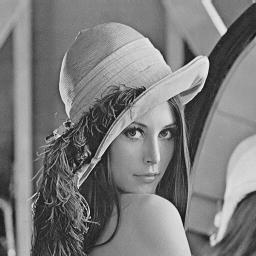

In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
cv2_imshow(gimg1)
#plt.imshow(gimg1, cmap='gray')

In [3]:
# 로버트 마스크

In [4]:
gx = np.array([[-1,0],[1,0]], dtype = int)    # gx =1  0
gy = np.array([[0,1],[-1,0]], dtype = int)     #    0  1


                                              # gy = 0 1
                                              #     -1 0

In [7]:
x = cv2.filter2D(gimg1, -1, gx)   # -1은 이전 영상과 같은 크기라는 의미
y = cv2.filter2D(gimg1, -1, gy)

In [8]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

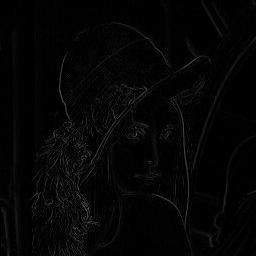

In [10]:
# outImg = outImg * n    # 가중치 조정

cv2_imshow(outImg)   # 고주파의 이미지만 추출된다. 일종의 전처리

In [13]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype = np.ubyte) # 엣지인지 아닌지 이진화 출력하기 위함

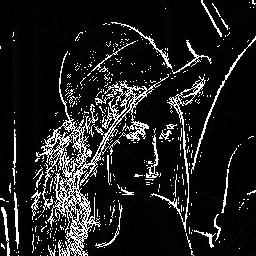

In [14]:
threshold = 10
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if outImg[h,w] > threshold:
      outImg[h,w] = 255



cv2_imshow(outImg)